In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#data
iris = datasets.load_iris()
#X, y = iris.data, iris.target

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica


#train_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

#feature engineering and modeling
model = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", svm.LinearSVC(C=1, loss="hinge", random_state=42)),
        ])

#model = tree.DecisionTreeClassifier()
#model = svm.LinearSVC(C=1, loss="hinge", random_state=42)

model.fit(X_train, y_train)

#accuracy
predictions = model.predict(X_test)
print (accuracy_score(y_test, predictions))



0.9333333333333333


In [2]:
#three data
#datasets.load_xxx
#datasets.fetch_xxx
#datasets.make_xxx

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a168aa410>,
      dtype=object)

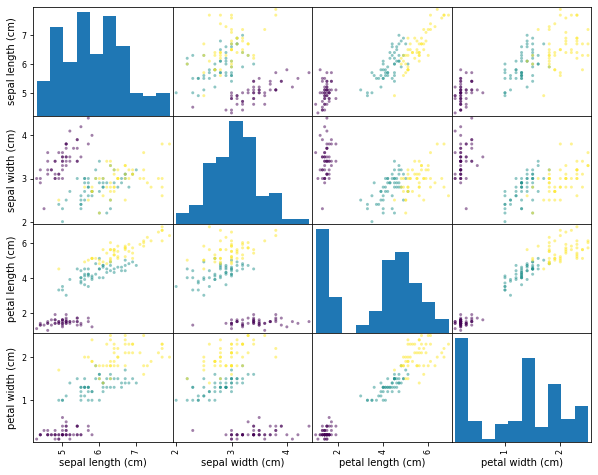

In [3]:
%matplotlib inline
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(df, c=iris.target, figsize=(10,8))

In [4]:
#DJ's KNN
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
x,y=data.data, data.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9790209790209791


In [5]:
x[1,:]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [6]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [7]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

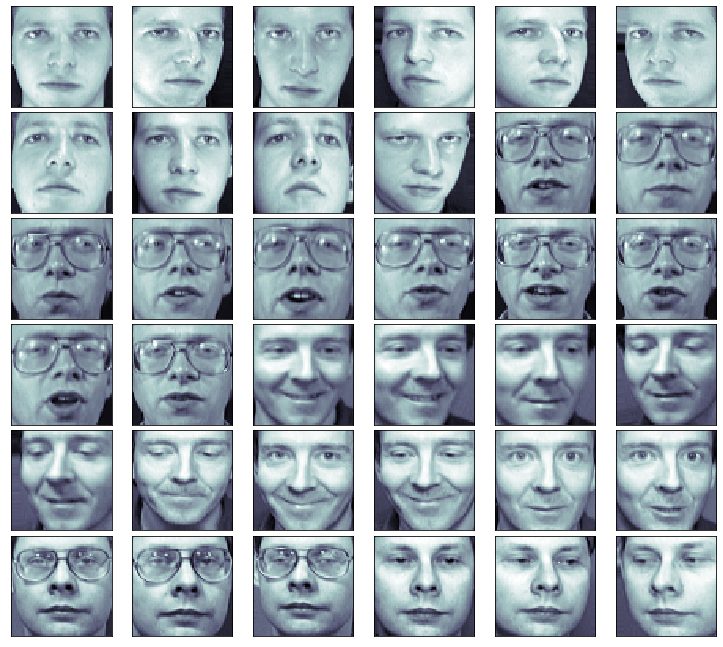

In [8]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0,right=1,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(faces.images[i],cmap=plt.cm.bone, interpolation='nearest')

In [9]:
#GridSearchCV (cross-validation)
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data=load_breast_cancer()
x,y=data.data, data.target
x=scale(x)

from sklearn.model_selection import GridSearchCV
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y)
param_grid={'n_neighbors': np.arange(1,15,2)}
grid=GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,
                 cv=10, return_train_score=True)
grid.fit(x_train, y_train)
print('best mean cross-validation score: {:.3f}'.format(grid.best_score_))
print('best parameters: {}'.format(grid.best_params_))

print('best set score: {:.3f}'.format(grid.score(x_test,y_test)))


best mean cross-validation score: 0.967
best parameters: {'n_neighbors': 3}
best set score: 0.972


In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data=load_breast_cancer()
x,y=data.data, data.target
x=scale(x)
x_trainval, x_test, y_trainval, y_test=train_test_split(x,y)
x_train, x_val, y_train, y_val=train_test_split(x_trainval,y_trainval)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print('validation: {:.3f}'.format(knn.score(x_val,y_val)))
print('test: {:.3f}'.format(knn.score(x_test,y_test)))


validation: 0.963
test: 0.958


In [11]:
#Nearest Centroid
from sklearn.neighbors import NearestCentroid
nc=NearestCentroid()
nc.fit(x_train, y_train)
print('accuracy: {:.2f}'.format(nc.score(x_test,y_test)))

accuracy: 0.93
